## Entendiendo el problema
Lo que deseen invertir o vender una propiedad se enfrentan al fenómeno especulativo existente en la valorización de éstos. ​Pese a que el precio depende, en cierta medida, de las tendencias que esté teniendo el mercado inmobiliario en un determinado tiempo, poder estimar adecuadamente si el precio es alto o bajo nos puede ayudar a hacer una clasificación inicial de las propiedades y posteriormente poder evaluarlas o plantear estrategias en base a su tipo (cara o barata). 

El objectivo de aquí en más es implementar un modelo de clasificación que permita clasificar el precio de las propiedades en venta, utilizando los datos que correspondientes al año 2020. 
Se intentará predecir la categorización de las propiedades entre baratas o caras, considerando como criterio el valor promedio de los precios (la media).​

In [6]:
# importar librerías necesarias librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # nos permite hacer gráficos
import seaborn as sns #nos permite hacer gráficos bonitos

### carga de datos

In [7]:
#se guardan la info del csv en un Dataframe de Pandas
properties_colombia_train = pd.read_csv('datasets/properties_colombia_train.csv')
properties_colombia_test = pd.read_csv('datasets/properties_colombia_test.csv')

### Análisis exploratorio de datos (EDA)

In [8]:
#ver la como se compone
properties_colombia_train.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


A simple vista podemos pensar que la primer columnas y el Id nos proporcionan info similar. 
Tenemos fechas del anuncio y creación. Tal vez se puede precindir de algunas columnas.

In [18]:
#le cambiamos el formato a los flotantes (sobretodo el precio) para que no se vea tan raro
#pd.options.display.float_format = '{:.,2f}'.format

In [221]:
#ver el tamaño del dataset de entrenamiento y de test
print(f'tamaño set entrenamiento: {properties_colombia_train.shape}, tamaño set test{properties_colombia_test.shape}')


tamaño set entrenamiento: (197549, 27), tamaño set test(65850, 26)


In [222]:
# Vemos si hay datos duplicados 
print(f'datos duplicados: {properties_colombia_train.duplicated().sum()}')

datos duplicados: 0


In [223]:
#veo las principales indicadores estadísticos (del set train)
properties_colombia_train.describe()
#algunos detalles: 
# - el mx de bedroom cambia bastante pero el desvío standar no (todo ok ahí)
# - los datos de surdace_covered varían un poco

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,"197,549.00","148,051.00","148,051.00","27,537.00","40,525.00","156,467.00","6,974.00","9,802.00","197,486.00"
mean,"497,437.84",5.67,-75.04,3.29,3.24,2.64,"1,352.13",948.34,"643,605,091.01"
std,"290,023.58",2.20,1.10,1.75,1.99,1.44,"7,713.77","37,308.75","1,944,867,706.99"
min,0.00,-32.79,-119.70,1.00,0.00,1.00,10.00,1.00,0.00
25%,"234,211.00",4.58,-75.65,3.00,3.00,2.00,72.00,71.00,"200,000,000.00"
50%,"507,385.00",4.91,-75.48,3.00,3.00,2.00,120.00,114.00,"330,000,000.00"
75%,"770,037.00",6.25,-74.09,4.00,4.00,3.00,281.00,216.00,"600,000,000.00"
max,"993,551.00",34.42,-67.48,40.00,96.00,20.00,"180,000.00","3,480,000.00","345,000,000,000.00"


In [29]:
#veo las principales indicadores estadísticos (del set test) a ver si hay mucha diferencia con el train -.-
properties_colombia_test.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,"65,850.00","49,433.00","49,433.00","9,110.00","13,403.00","52,054.00","2,314.00","3,305.00"
mean,"500,260.29",5.69,-75.04,3.28,3.24,2.64,"1,355.28","5,616.34"
std,"290,438.14",2.22,1.10,1.70,1.97,1.43,"9,409.88","301,293.35"
min,4.00,-4.20,-81.71,1.00,0.00,1.00,10.00,1.00
25%,"235,030.50",4.58,-75.64,3.00,3.00,2.00,74.00,71.00
50%,"509,299.50",4.92,-75.48,3.00,3.00,2.00,120.00,115.00
75%,"772,024.50",6.25,-74.09,4.00,4.00,3.00,274.50,213.00
max,"993,559.00",13.34,-67.92,40.00,60.00,20.00,"200,000.00","17,320,000.00"


In [9]:
#Se saca el promedio de la columnas precios para poder dividir la variable objetivo 

media = properties_colombia_train['price'].mean()
print(media)

643605091.0064613


In [225]:
#comparo entre media y mediana. Puede que haya mas casas caras que baratas - la distribución estä sesgada a la derecha 
print(properties_colombia_train['price'].mean())
print(properties_colombia_train['price'].median())


643605091.0064613
330000000.0


In [10]:
#como vamos a modificar unas columnas lo hacemos en una copia
propiedades = properties_colombia_train.copy()

In [11]:
#se crea una columna con la variable objetivo, siendo 1=caro y 0=barato
propiedades['target'] = np.where(propiedades['price']>=media, 1, 0)

In [12]:
propiedades.drop(['price'], axis=1, inplace=True)

In [13]:
propiedades.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0


In [14]:
#ver cuantos hay de cada uno 
propiedades.target.value_counts()

0    151191
1     46358
Name: target, dtype: int64

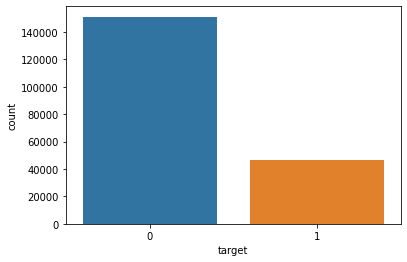

In [98]:
#vemos como se compone la variable objetivo (0=barajo y 1=caro)
sns.countplot(x='target', data=propiedades) 
plt.show()

Si bien hay mucha más proporcion de clase 0, no se considera que se encuentre desbalanceado. 

## 1. Valores faltantes

In [15]:
# veo % de nulos en todo el dataset
na_ratio = ((propiedades.isnull().sum() / len(propiedades))*100).sort_values(ascending = False)
print(na_ratio)

l6                 96.523900
surface_total      96.469737
surface_covered    95.038193
l5                 86.125468
rooms              86.060674
price_period       81.791353
bedrooms           79.486102
l4                 77.035065
lat                25.056062
lon                25.056062
bathrooms          20.795853
l3                  5.584437
description         0.061251
currency            0.033916
title               0.000506
geometry            0.000000
operation_type      0.000000
property_type       0.000000
Unnamed: 0          0.000000
id                  0.000000
l2                  0.000000
l1                  0.000000
created_on          0.000000
end_date            0.000000
start_date          0.000000
ad_type             0.000000
target              0.000000
dtype: float64


In [17]:
#importamos libreria de missingno para ver los faltantes
#pip install missingno 
import missingno as msno

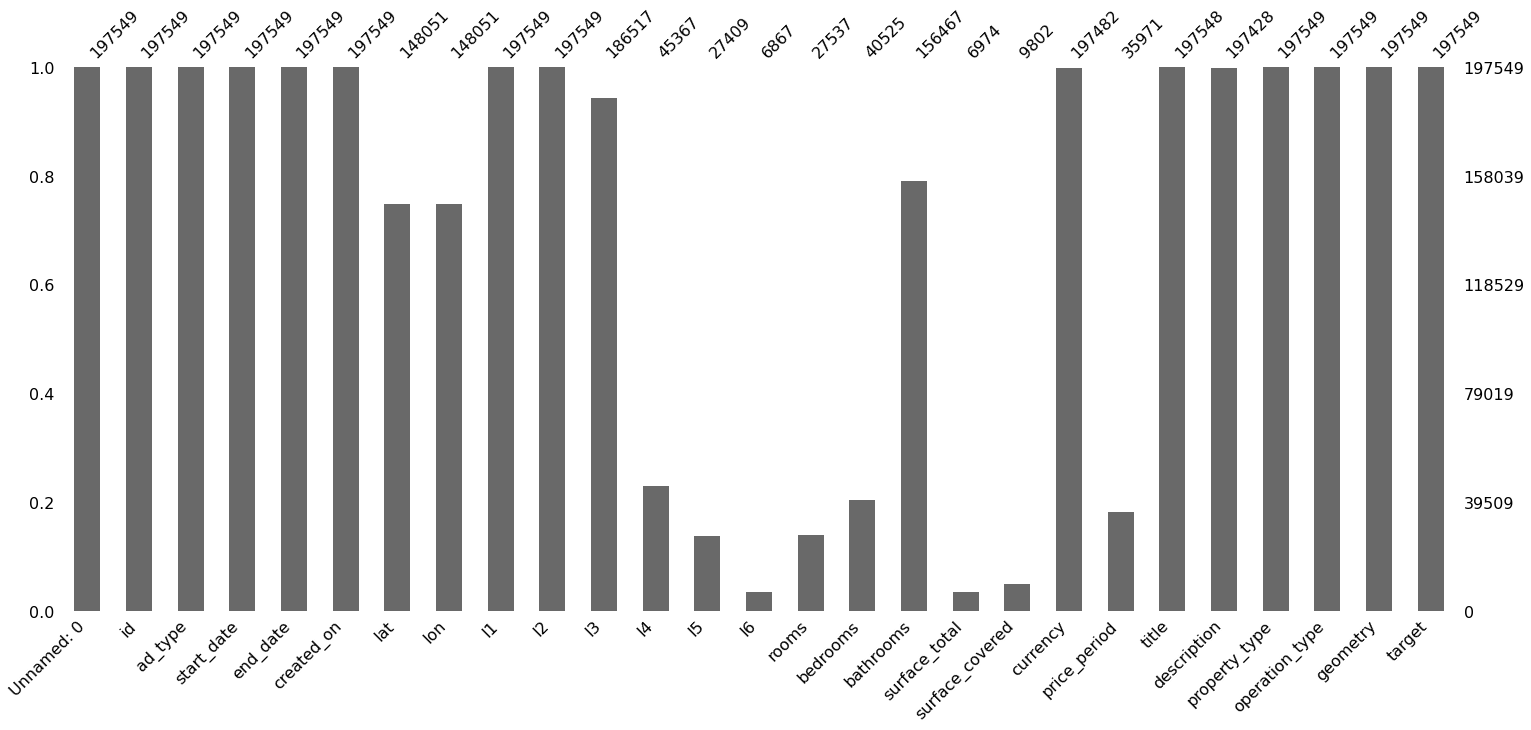

In [18]:
msno.bar(propiedades)
plt.show()

Hay varias columnas con significante cantidad de faltantes. Veremos que info presentan y si son relevantes

In [233]:
#latitud y longitud podemos obtener los valores gracias a la otra columna geometry
#latnull = properties_colombia_train[properties_colombia_train['lat'].isnull()]

In [19]:
propiedades[propiedades['lat'].isnull()]['l2'].unique()
#dict(zip(keys, values))

array(['Santander', 'Antioquia', 'Atlántico', 'Córdoba', 'Cundinamarca',
       'Meta', 'Valle del Cauca', 'Caldas', 'Risaralda', 'Magdalena',
       'Cauca', 'Huila', 'Bolívar', 'Tolima', 'Norte de Santander',
       'Quindío', 'Caquetá', 'Sucre', 'Boyacá', 'Guainía', 'La Guajira',
       'Cesar', 'Amazonas', 'San Andrés Providencia y Santa Catalina',
       'Casanare', 'Vichada', 'Chocó'], dtype=object)

In [ ]:
#podria funcionar un KNN imputer para obtener valores faltantes o usar un map? --> para implementar 

In [20]:
#Se intentó imputar valores con geolocalización (geopy) pero por el tamaño del dataset se da un timeout. Se puede volver a ver esto más adelante
propiedades[(propiedades['lat'].isnull()) & (propiedades['l4'].notnull())].iloc[:, [7, 9, 11, 12, 13] ]

,lon,l2,l4,l5,l6
19,NaN,Cundinamarca,Zona Noroccidental,Suba,Villa Maria
52,NaN,Cundinamarca,Zona Suroccidental,Bosa,NaN
244,NaN,Atlántico,Las Palmas,NaN,NaN
293,NaN,Cundinamarca,Zona Noroccidental,Suba,NaN
365,NaN,Cundinamarca,Zona Suroccidental,Bosa,NaN
...,...,...,...,...,...
197420,NaN,Cundinamarca,Zona Occidental,Engativa,NaN
197436,NaN,Cundinamarca,Zona Norte,Usaquén,NaN
197477,NaN,Cundinamarca,Zona Suroccidental,Bosa,NaN
197503,NaN,Cundinamarca,Zona Norte,Usaquén,NaN


In [145]:
print('Porcentaje de valores faltantes de la variable Lat:', (propiedades.lat.isnull().sum()/len(propiedades))*100)
print('Porcentaje de valores faltantes de la variable Lon:', (propiedades.lon.isnull().sum()/len(propiedades))*100)

Porcentaje de valores faltantes de la variable Lat: 25.05606204030392
Porcentaje de valores faltantes de la variable Lon: 25.05606204030392


### . Tratamiento de de valores faltantes (imputación o eliminación)

Si bien los valores faltantes de latitud y longuitud son significativos. Al no poder imputar de forma exacta, se recomienda eliminar las filas que contienen nulos. Se decide no remplazar por otros valores como media o mediana ya que no sería acertado en el análisis. 

In [23]:
propiedades.dropna(subset=['lat', 'lon'], inplace=True)

In [24]:
propiedades

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
5,991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,2020-12-17,5.049009,-75.506802,Colombia,Caldas,...,NaN,NaN,COP,NaN,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894),0
6,51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,2020-09-13,4.732379,-74.082150,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,NaN,17.0,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,NaN,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,NaN,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


In [25]:
#chequeamos los cambios
print('Porcentaje de valores faltantes de la variable Lat:', (propiedades.lat.isnull().sum()/len(propiedades))*100)
print('Porcentaje de valores faltantes de la variable Lon:', (propiedades.lon.isnull().sum()/len(propiedades))*100)

Porcentaje de valores faltantes de la variable Lat: 0.0
Porcentaje de valores faltantes de la variable Lon: 0.0


In [26]:
#pip install folium
#Graficamos para ver si todas las coordenasdas que tenemos están correctas
import folium

mapa=folium.Map(location=[4.570868, -74.297333],zoom_start=5)


In [27]:
distritos=propiedades[ ['lat','lon'] ].to_numpy()

In [ ]:
from folium.plugins import HeatMap

HeatMap(distritos, radius=15, max_val=0.1, min_opacity=0.3).add_to(mapa)
mapa

In [ ]:
#agrupar por latitud y long para ver la distribución
lat_long = propiedades.groupby(['lat', 'lon']).size()
lat_long[lat_long < 2].sort_values(ascending=False)

Podemos ver que algunos puntos se encuentran fuera de los límites de Colombia, pero por el color que se ve en el mapa, en principio no parecería que su magnitud pudiera afectar al resultado final

In [ ]:
#properties_colombia_train.copy().sort_values('lon', ascending=False)
propiedades.copy().sort_values('lat')

In [152]:
propiedades[ (propiedades['lat'] <= -1) | (propiedades['lat']>30) ]
#podemos ver que estas propiedades son las que se encuentran en los puntos del mapa fuera de colombia 

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry,target
138682,172722,0xtrMhsbAsQiEv9XHGWTIQ==,Propiedad,2020-09-29,2021-07-26,2020-09-29,-32.787342,-71.20732,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,51548 LA CALERA MIRADO DEL LAGO,"Casa hermosa,amplia, vigilancia sector&nbsp; t...",Casa,Venta,POINT (-71.20732 -32.787342),1
148562,819292,s6bCv2RXRdHQGyS2+7WZ8Q==,Propiedad,2020-11-06,2021-07-26,2020-11-06,34.420334,-119.69819,Colombia,Cundinamarca,...,NaN,NaN,COP,NaN,51599 SANTA BARBARA APARTAMENTO 506,"Apartamento&nbsp; para&nbsp; remodelar , duple...",Apartamento,Venta,POINT (-119.69819 34.420334),0


In [29]:
#las siguientes columnas con muchos faltantes son: 'l4','l5','l6' que son complementarias entre si, ya que si se concatenan, nos habla sobre la ubicación.
propiedades[['l1', 'l2', 'l3', 'l4', 'l5', 'l6']]

,l1,l2,l3,l4,l5,l6
0,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN
1,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN
2,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza
5,Colombia,Caldas,Manizales,NaN,NaN,NaN
6,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN
...,...,...,...,...,...,...
197544,Colombia,Cundinamarca,Bogotá D.C,Zona Suroccidental,Kennedy,NaN
197545,Colombia,Cundinamarca,Bogotá D.C,Zona Chapinero,Chapinero,El Retiro
197546,Colombia,Valle del Cauca,Cali,NaN,NaN,NaN
197547,Colombia,Cundinamarca,Bogotá D.C,Zona Occidental,Fontibón,NaN


Ya que utilizaremos las coordenadas de geoloalización podemos descartar estas columnas

In [30]:
#eliminamos esas columnas
#eliminación de la columna 
propiedades.drop(['l1', 'l2', 'l3', 'l4', 'l5', 'l6'], axis=1, inplace=True)

In [166]:
#visualizamos que se hayan hecho los cambios correctamente
propiedades.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,rooms,bedrooms,...,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,NaN,4.0,...,NaN,NaN,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,NaN,3.0,...,NaN,NaN,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0


Las siguientes columnas con valores faltantes significantes tienen que ver con la composición de la propiedad:
room, bedroom y bathroom

In [197]:
propiedades.shape

(148051, 21)

In [54]:
#vemos la moda agrupada por tipo de propiedad
propiedades.groupby(['property_type']).agg(pd.Series.mode).iloc[:, [7, 8, 9, 10, 11] ]

/var/folders/9y/hwhn13gx33x0n3fjt7f9k0y00000gn/T/ipykernel_6820/1240975474.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  propiedades.groupby(['property_type']).agg(pd.Series.mode).iloc[:, [7, 8, 9, 10, 11] ]


,rooms,bedrooms,bathrooms,surface_total,surface_covered
property_type,,,,,
Apartamento,3.0,3.0,2.0,60.0,60.0
Casa,3.0,3.0,3.0,90.0,120.0
Finca,3.0,3.0,3.0,3000.0,200.0
Local comercial,1.0,0.0,1.0,24.0,23.0
Lote,1.0,0.0,1.0,2500.0,3000.0
Oficina,1.0,0.0,1.0,138.0,"[50.0, 63.0]"
Otro,3.0,3.0,1.0,600.0,600.0
Parqueadero,"[3.0, 5.0]",0.0,[],"[399.0, 750.0]",750.0


In [42]:
#vemos alunas distribuciones con mediana
#propiedades.groupby('property_type').mean()
propiedades.groupby('property_type').median()
#propiedades.groupby('property_type').agg({'rooms': ['min', 'max'], 'bedrooms': ['min', 'max'], 'surface_total':['min', 'max'], 'surface_covered': ['min', 'max'] })


,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,target
property_type,,,,,,,,,
Apartamento,496121.0,5.051631,-75.488114,3.0,3.0,2.0,84.0,88.0,0.0
Casa,514333.0,4.802957,-75.334000,4.0,4.0,3.0,192.0,201.0,0.0
Finca,444501.0,4.802764,-75.691294,4.0,4.0,3.0,6350.0,333.5,1.0
Local comercial,526141.5,4.711254,-75.487644,2.0,0.0,1.0,66.5,60.0,0.0
Lote,493994.0,5.037467,-75.384000,3.0,0.0,2.0,2314.5,1222.0,0.0
Oficina,448190.0,4.692000,-74.066000,1.0,0.0,1.0,80.0,74.5,0.0
Otro,534490.5,4.984509,-75.487308,4.0,4.0,3.0,400.0,616.5,0.0
Parqueadero,310720.5,5.667427,-74.743950,4.0,1.5,NaN,574.5,750.0,0.0


Los valores de la moda, media y la mediana son similares entre sí tienen sentido para las propiedades.
Utilizaremos la Mediana para llenar los valores faltantes en la columna bathrooms y bedrooms.

In [203]:
#vemos la cantidad de nulos
propiedades['bathrooms'].isnull().count().sum()

148051

In [80]:
#llenamos los valores nulos por la mediana de la misma columna
#lo hago en dos lineas separadas por si después quiero dejar sólo una de las dos ;)
propiedades['bathrooms'].fillna(propiedades['bathrooms'].median())
propiedades['bedrooms'].fillna(propiedades['bedrooms'].median())

0         4.0
1         2.0
2         2.0
5         2.0
6         8.0
         ... 
197544    2.0
197545    1.0
197546    1.0
197547    2.0
197548    1.0
Name: bathrooms, Length: 148051, dtype: float64

In [81]:
#chequeamos el cambio
print(propiedades['bathrooms'].isnull().sum())


0

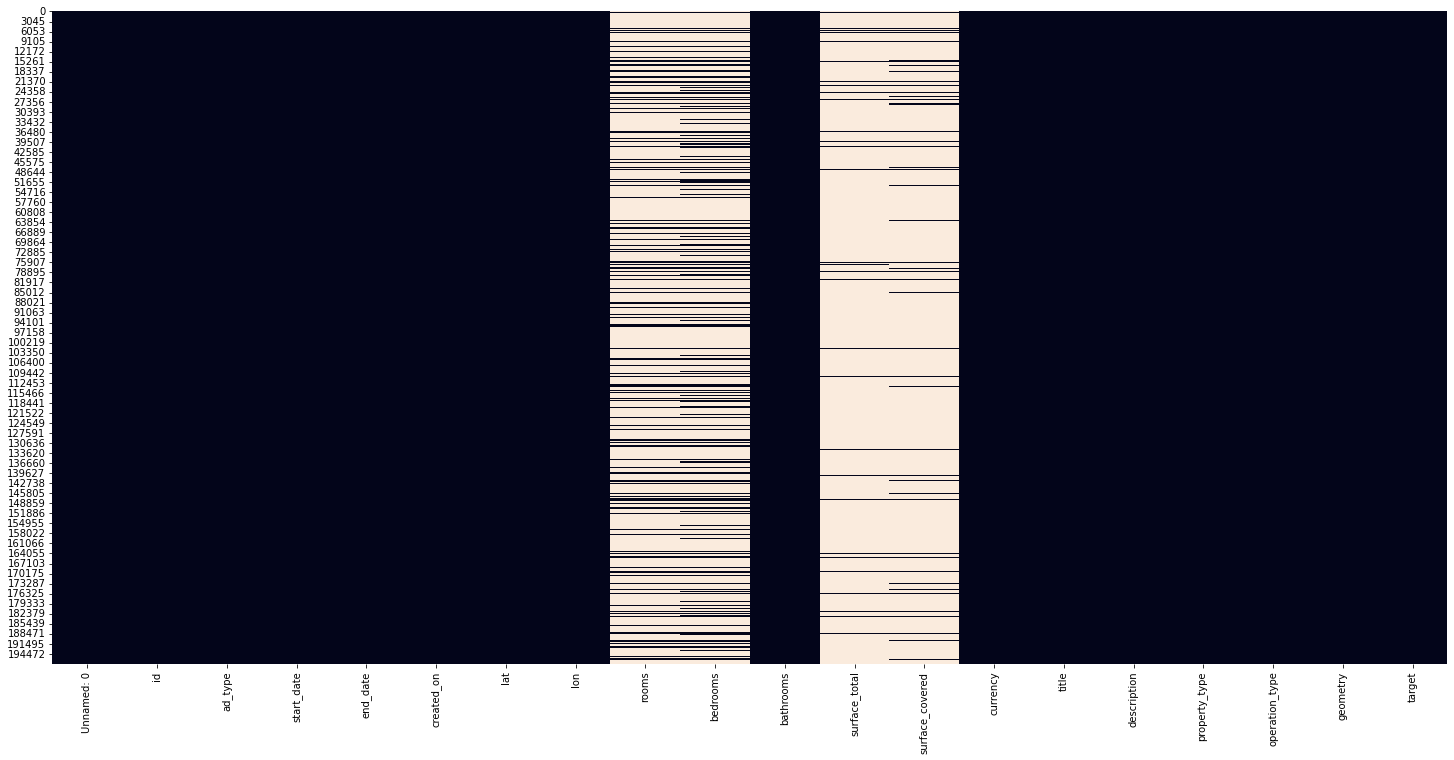

In [82]:
# Re-visualziamos como vienen los nulos hasta ahora (con otro gráfico)

plt.figure(figsize= (25,12))
sns.heatmap(propiedades.isnull(), cbar=False)
plt.show()

Vemos la relación entre superficia total y supervicia cubierta ya que podrían estar aportando información similar

In [71]:
#vemos elnivel de correlación
propiedades.loc[:,['surface_total','surface_covered']].corr()

,surface_total,surface_covered
surface_total,1.000000,0.693788
surface_covered,0.693788,1.000000


La relación no es tan alta, por lo que por el momento lo dejamos. 

Veamos que hay en price_period

In [73]:
#veamos que hay en esta columna
propiedades['price_period'].unique()

array([nan, 'Mensual'], dtype=object)

Según lo que nos plantearon los clientes al principio, son todas publicaciones de VENTA por lo que no tendría lógica que haya algo mensual. 
Cómo la columna no aporta nada (aunque se agregue algo como: anual) se elimina la columna completa

In [ ]:
propiedades[propiedades['price_period']=='Mensual']

In [78]:
propiedades = propiedades.drop(['price_period'], axis=1)

In [83]:
propiedades.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,NaN,4.0,4.0,NaN,NaN,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,NaN,3.0,2.0,NaN,NaN,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,NaN,NaN,2.0,NaN,NaN,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
5,991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,2020-12-17,5.049009,-75.506802,NaN,NaN,2.0,NaN,NaN,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894),0
6,51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,2020-09-13,4.732379,-74.082150,NaN,NaN,8.0,NaN,NaN,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379),1


Hay varias columnas que no aportan mucho asi que las vamos a eliminar y explicar por qué en cada línea

In [90]:
# a ver que hay en ad_type y currency
print(f'Valores posibles en la columna ad_type {propiedades["ad_type"].unique()}')
print(f'Valores posibles en la columna currancy {propiedades["currency"].unique()}')
print(f'Valores posibles en la columna operation_type {propiedades["operation_type"].unique()}')


Valores posibles en la columna ad_type ['Propiedad']
Valores posibles en la columna currancy ['COP' nan 'USD']


In [106]:
#veamos cuantos valores están en USD
(propiedades["currency"]=='USD').sum()
print(((propiedades["currency"]=='USD').sum())/(propiedades.shape[0]))
#casi nada --> se opta por dejar los valores porque no se considera que vayan a modificar el resultado de la predicción

4.7281004518713146e-05


In [107]:
#las escribo en líneas separadas para que si hay que modificar después sea más sencillo
propiedades = propiedades.drop(['Unnamed: 0'], axis=1) #probablemente el id unico. No aporta nada
propiedades = propiedades.drop(['id'], axis=1) #al generarse cada vez que se publica un nuevo aviso es muy poco generalista
propiedades = propiedades.drop(['ad_type'], axis=1)  #Tiene el mismo valor siempre. Es redundante
propiedades = propiedades.drop(['start_date'], axis=1) #la fecha de inicio es la misma que created on. Es info duplicada. 
propiedades = propiedades.drop(['end_date'], axis=1) #la fecha de fin del aviso no aporta en cuanto a las carateristcas de la propiedad. Ruido
propiedades = propiedades.drop(['currency'], axis=1)  #Es redundante
propiedades = propiedades.drop(['operation_type'], axis=1)  #Tiene el mismo valor siempre. Es redundante

In [112]:
propiedades = propiedades.drop(['geometry'], axis=1)  #Esta columna es igual a los datos lat, lon. Si bien en general puede ser mejor tener una sola con ambos datos, voy a probar con los datos separados en caso de que haya una tendencia por ej sólo en ciertos lugares por latitud por ej.

In [113]:
propiedades.head(3)

,created_on,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,title,description,property_type,target
0,2020-12-14,6.203000,-75.572000,NaN,4.0,4.0,NaN,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,1
1,2020-09-16,4.722748,-74.073115,NaN,3.0,2.0,NaN,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,0
2,2020-08-19,4.709000,-74.030000,NaN,NaN,2.0,NaN,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,0


Si bien las columnas de tittle y description podrían ayudarnos, se debería hacer un analísis más amplio. En este momento vamos a probar sin estas features. 

In [114]:
propiedades = propiedades.drop(['title'], axis=1)
propiedades = propiedades.drop(['description'], axis=1)

In [116]:
propiedades

,created_on,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,target
0,2020-12-14,6.203000,-75.572000,NaN,4.0,4.0,NaN,NaN,Casa,1
1,2020-09-16,4.722748,-74.073115,NaN,3.0,2.0,NaN,NaN,Apartamento,0
2,2020-08-19,4.709000,-74.030000,NaN,NaN,2.0,NaN,NaN,Casa,0
5,2020-12-17,5.049009,-75.506802,NaN,NaN,2.0,NaN,NaN,Apartamento,0
6,2020-09-13,4.732379,-74.082150,NaN,NaN,8.0,NaN,NaN,Casa,1
...,...,...,...,...,...,...,...,...,...,...
197544,2020-10-27,4.649682,-74.161950,3.0,3.0,2.0,NaN,NaN,Apartamento,0
197545,2020-11-27,4.668000,-74.055000,NaN,NaN,1.0,NaN,17.0,Oficina,0
197546,2020-10-28,3.413000,-76.541000,NaN,NaN,1.0,NaN,NaN,Otro,0
197547,2020-08-14,4.674874,-74.147077,NaN,NaN,2.0,NaN,NaN,Casa,0


Como se había dicho arriba. Las variable de rooms, bedroom y rooms se pueden remplazar por la media. 
Lamentrablemente para ´surface_total´ y ´surface_covered´ no hay forma de inferir estos valores. Asi que los vamos a eliminar

In [121]:
propiedades = propiedades.drop(['surface_total'], axis=1)
propiedades = propiedades.drop(['surface_covered'], axis=1)

In [151]:
propiedades

,created_on,lat,lon,rooms,bathrooms,property_type,target
0,2020-12-14,6.203000,-75.572000,3.0,4.0,Casa,1
1,2020-09-16,4.722748,-74.073115,3.0,2.0,Apartamento,0
2,2020-08-19,4.709000,-74.030000,3.0,2.0,Casa,0
5,2020-12-17,5.049009,-75.506802,3.0,2.0,Apartamento,0
6,2020-09-13,4.732379,-74.082150,3.0,8.0,Casa,1
...,...,...,...,...,...,...,...
197544,2020-10-27,4.649682,-74.161950,3.0,2.0,Apartamento,0
197545,2020-11-27,4.668000,-74.055000,3.0,1.0,Oficina,0
197546,2020-10-28,3.413000,-76.541000,3.0,1.0,Otro,0
197547,2020-08-14,4.674874,-74.147077,3.0,2.0,Casa,0


In [141]:
propiedades['bedrooms'] = propiedades['bedrooms'].fillna(propiedades['bedrooms'].median())



In [144]:
#hacemos una funcion que cree mapa de calor segun la correlacion
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

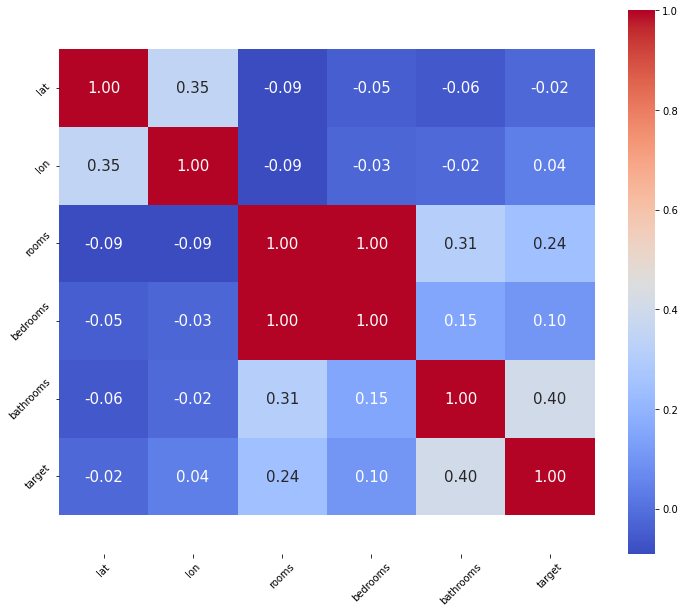

In [145]:
#hago un grafico
corr = propiedades.corr()
plot_corre_heatmap(corr)

In [146]:
#eliminamos la columna de bedroom que aporta la misma infor que bathroom 
propiedades = propiedades.drop(['bedrooms'], axis=1)

In [148]:
#relleno los valores con la mediana
propiedades['rooms'] = propiedades['rooms'].fillna(propiedades['rooms'].median())

In [157]:
#esta columna hay que borrarla antes, ya que la fecha no es indicacor del precio y hay muchas distintas
propiedades = propiedades.drop(['created_on'], axis=1)

In [158]:
propiedades

,lat,lon,rooms,bathrooms,property_type,target
0,6.203000,-75.572000,3.0,4.0,Casa,1
1,4.722748,-74.073115,3.0,2.0,Apartamento,0
2,4.709000,-74.030000,3.0,2.0,Casa,0
5,5.049009,-75.506802,3.0,2.0,Apartamento,0
6,4.732379,-74.082150,3.0,8.0,Casa,1
...,...,...,...,...,...,...
197544,4.649682,-74.161950,3.0,2.0,Apartamento,0
197545,4.668000,-74.055000,3.0,1.0,Oficina,0
197546,3.413000,-76.541000,3.0,1.0,Otro,0
197547,4.674874,-74.147077,3.0,2.0,Casa,0


### Escalado / normalización

In [160]:
#vemos los valores posibles
propiedades['property_type'].unique()

array(['Casa', 'Apartamento', 'Otro', 'Oficina', 'Finca', 'Lote',
       'Local comercial', 'Parqueadero'], dtype=object)

In [161]:
#veamos la frecuencia de cada uno 
propiedades['property_type'].value_counts()

Apartamento        69685
Casa               48940
Otro               13136
Lote               12931
Local comercial     1202
Finca               1119
Oficina             1030
Parqueadero            8
Name: property_type, dtype: int64

In [162]:
from sklearn.preprocessing import OneHotEncoder

data_encoded = propiedades[['property_type']]
ohe = OneHotEncoder(handle_unknown = 'ignore')  #nominal_codificator
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())

In [165]:
#ver que se hayan cargado correctamente
ohe.categories_

[array(['Apartamento', 'Casa', 'Finca', 'Local comercial', 'Lote',
        'Oficina', 'Otro', 'Parqueadero'], dtype=object)]

In [163]:
# Incorporamos el dataframe codificado al dataframe original

propiedades = propiedades.join(data_encoded)

In [164]:
#vemos que tal quedo el dataset
propiedades

,lat,lon,rooms,bathrooms,property_type,target,0,1,2,3,4,5,6,7
0,6.203000,-75.572000,3.0,4.0,Casa,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.722748,-74.073115,3.0,2.0,Apartamento,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.709000,-74.030000,3.0,2.0,Casa,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.049009,-75.506802,3.0,2.0,Apartamento,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.732379,-74.082150,3.0,8.0,Casa,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,4.649682,-74.161950,3.0,2.0,Apartamento,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197545,4.668000,-74.055000,3.0,1.0,Oficina,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197546,3.413000,-76.541000,3.0,1.0,Otro,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197547,4.674874,-74.147077,3.0,2.0,Casa,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## pipeline

In [ ]:
#importar las librerias necesarias para el pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #vamos a probar escalar todo con standar scaler, pero se puede modificar despues

In [ ]:
#crear lista de variables num. y categoricas
lista_numericas=['lat', 'lon', 'rooms', 'bathrooms'] #numeric list
lista_cat=['property_type']

In [ ]:
#creo el pipeline de preprocesamiento separando el tipo de dato (num o cat)
transformer_numerico = Pipeline (steps=[('scaler', StandardScaler() ) ] ) #numeric_transformer
transformer_cat = Pipeline (steps=[('onehot', OneHotEncoder() )])

In [ ]:
#definir los transformadores
transformer = ColumnTransformer([ ('num',transformer_numerico,lista_numericas), ('cat', transformer_cat,lista_cat) ])